## K-fold method training (K=10)
This code use k-fold method to reduce the MSE:

MSE values for each fold: [26.185989245555653, 48.90603533623202, 38.27610213337226, 22.51341230187167, 29.063902374394747, 6.681130568799362, 20.125471955536174, 36.591989559239586]
R2 values for each fold: [0.9486285668193065, 0.893617392567637, 0.9353943811779779, 0.9413428465265792, 0.927812643438342, 0.9808573941423909, 0.9321121264301947, 0.89139632187452]
MAE: [3.5137389804425885, 4.459433887556477, 3.990278531947838, 3.6277220809781934, 3.901549759054407, 2.191474522676888, 2.9938276150337604, 4.0386605180159485]
Mean MSE: 28.54300418437519
Mean R2: 0.9313952091221185
Standard deviation of MSE: 12.06830351770566
Mean MAE: 3.5895857369632624


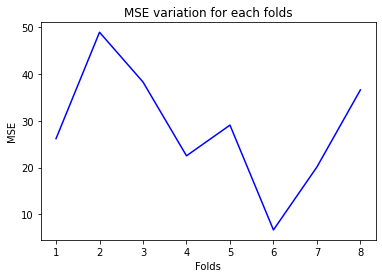

In [10]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

# Load your data into a pandas DataFrame
df = pd.read_csv("your_data2.csv")
df.reset_index(drop=True, inplace=True)

# Define the features and target variable
X = df[["E","Q","C"]]
y = df["CBR"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a KFold object
kf = KFold(n_splits=8, shuffle=True, random_state=0)

# Initialize an empty list to store the MSE values for each fold
mse_values = []
r2_values=[]
mae_values = []
# Iterate over the folds
for train_index, test_index in kf.split(X_train):
    # Get the training and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model and set the hyperparameters
    regr = RandomForestRegressor(n_estimators=1000, max_depth=4, random_state=0)
    
    # Fit the model to the training data
    regr.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the test set
    y_pred_fold = regr.predict(X_test_fold)
    
    # Calculate the MSE
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_values.append(mse)
    r2=r2_score(y_test_fold, y_pred_fold)
    r2_values.append(r2)
    mae = mean_absolute_error(y_test_fold, y_pred_fold)
    mae_values.append(mae)
    

# Print the MSE values for each fold
print("MSE values for each fold:", mse_values)
print("R2 values for each fold:", r2_values)
print("MAE:", mae_values)

# Print the mean MSE
mean_mse = np.mean(mse_values)
print("Mean MSE:", mean_mse)

# Print the mean R2
mean_r2 = np.mean(r2_values)
print("Mean R2:", mean_r2)

# Print the standard deviation of the MSE
std_mse = np.std(mse_values)
print("Standard deviation of MSE:", std_mse)

# Print the mean MAE
mean_mae = np.mean(mae_values)
print("Mean MAE:", mean_mae)


# Scatter plot for MSE variation 
plt.plot( list(range(1,kf.n_splits+1)), mse_values, color='blue')
plt.title('MSE variation for each folds')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()

In [12]:
# Use the model to make predictions on the test data
y_pred = regr.predict(X_test)
print("Predict result:",len(y_pred))

y_predict = pd.Series(y_pred, index=X_test.index)
result = pd.concat([X_test, y_test, y_predict], axis=1)
# result.columns = ['E','Q','C','y test', 'y predict']

# result = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test),pd.DataFrame(y_pred)], axis=1)
# result = pd.concat([X_test, y_test, y_pred], axis=1, keys=['X_test', 'y_test', 'y_pred'], join='inner').reset_index(drop=True)

result.columns=['E','Q','C',"y test","y predict"]
print(pd.DataFrame(result))


# Evaluate the performance of the model using metrics such as mean squared error or R-squared
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

Predict result: 51
            E      Q       C  y test  y predict
153  16000000  18.62   54.59   14.21  16.943329
122  12000000  32.58  117.38   21.30  20.840643
92   12000000  34.85   82.17   19.38  20.747093
158  60000000  18.62   54.59   25.35  27.297152
149   5890250  40.00   54.59   11.02   9.544610
162  11292300  20.62   20.00    7.54   6.783565
152  12000000  18.62   54.59   12.40  13.838376
83   52986395  10.00   82.17   21.01  31.071496
63   80000000  23.00   73.54   41.93  34.977030
144   5890250  15.00   54.59    8.10   9.200436
155  30000000  18.62   54.59   18.87  19.892004
231  64926000  40.92  110.00   77.26  69.443880
108  66150660  32.58   80.00   57.24  58.169419
187  50000000  20.62   56.81   26.42  29.954912
116  66150660  25.00  117.38   50.24  46.854381
73   52986395  34.85  100.00   55.47  53.277393
204  41601300  15.00   72.33   21.78  28.239181
203  41601300  10.00   72.33   17.55  28.173148
178  11292300  35.00   56.81   16.37  13.919092
96   40000000  34.85 

In [13]:
# Load your new data into a pandas DataFrame
new_data = pd.read_csv("new_data2.csv")

# Extract the relevant features from the new data
X_new = new_data[['E', 'Q', 'C']]
y_new = new_data[['CBR (Real)']]

# Use the trained model to predict the CBR for the new data
y_pred = regr.predict(X_new)


# Print the predictions
y_predict = pd.Series(y_pred, index=X_new.index)
result = pd.concat([X_new,y_new, y_predict], axis=1)

result.columns=['E','Q','C','CBR',"Predicted CBR"]
print(pd.DataFrame(result))

# Evaluate the performance of the model using metrics such as mean squared error or R-squared
print("MSE: ", mean_squared_error(y_new, y_predict))
print("R2: ", r2_score(y_new, y_predict))
print("MAE: ", mean_absolute_error(y_new, y_predict))

              E      Q       C   CBR  Predicted CBR
0  4.267665e+06  18.62   54.59   9.9       9.200436
1  9.071009e+06  19.40   51.00  11.2       9.701242
2  3.553848e+07  23.00   73.54  14.0      23.986794
3  1.129230e+07  20.68   56.81  14.2      13.805144
4  4.267665e+06  23.00  100.00  14.7      10.775036
5  3.655741e+07  35.00   72.33  43.8      37.164018
6  5.298640e+07  34.85   82.17  53.1      53.128517
7  6.455741e+07  45.15  100.68  60.6      69.326540
8  6.615066e+07  32.58  117.38  65.1      59.082705
MSE:  30.492264216994947
R2:  0.937042556275201
MAE:  4.212585540955644
